In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

## 1. StreamVByte

In [2]:
streamvbyte = pd.read_csv('traces/streamvbyte/trace.csv', header=0,
                          usecols=['tick', 'fu used', 'width'])
streamvbyte['cycle'] = (streamvbyte['tick'] - streamvbyte['tick'].iloc[0]) / 500 
streamvbyte.shape

(3999708, 4)

The average unit usage is: 0.615
The width required is: 34.1


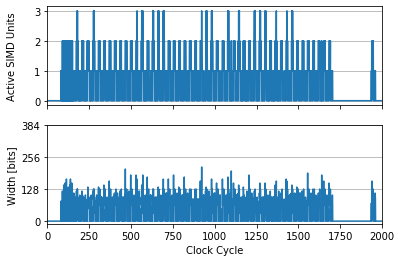

In [3]:
start = 3903100
N = 2000
sl = slice(start, start+N)
df1 = streamvbyte.iloc[sl].copy()

print('The average unit usage is: {}'.format(df1['fu used'].mean()))
print('The width required is: {}'.format(df1['width'].mean()))

x = df1['cycle'] - df1['cycle'].iloc[0]
y1 = df1['fu used']
y2 = df1['width']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y1)
ax1.set_yticks([0, 1, 2, 3])
ax1.grid(axis='y')
ax1.set_ylabel('Active SIMD Units')
ax2.plot(x, y2)
ax2.set_yticks([0, 128, 256, 384])
ax2.grid(axis='y')
ax2.set_ylabel('Width [bits]')
ax2.set_xlim(0, N)
ax2.set_xlabel('Clock Cycle')
fig.align_ylabels()

#fig.savefig('./plots/trace_streamvbyte.pdf', bbox_inches='tight')

In [4]:
del streamvbyte

In [5]:
df_aux = df1[df1['fu used'] > 0]
s_aux = df_aux['width'] / 128 / df_aux['fu used']
print('The average usage of each unit is {0:.2f}'.format(s_aux.mean()))

The average usage of each unit is 0.48


In [6]:
av = df1[df1['fu used'] > 1]['width'].mean()
m = df1[df1['fu used'] > 1]['width'].max()
f = df1[df1['fu used'] > 1].shape[0] / 2000
print('When 2 or 3 units are in use ({}), one average only {} bits are used, with a max of {}'.format(f, av, m))

When 2 or 3 units are in use (0.198), one average only 97.03030303030303 bits are used, with a max of 216


## 2. IntegerNN

In [7]:
integerNN = pd.read_csv('traces/integerNN/trace.csv', header=0,
                        usecols=['tick', 'fu used', 'width'])
integerNN['cycle'] = (integerNN['tick'] - integerNN['tick'].iloc[0]) / 500 

integerNN.shape

(38009223, 4)

The average unit usage is: 1.08
The width required is: 50.888


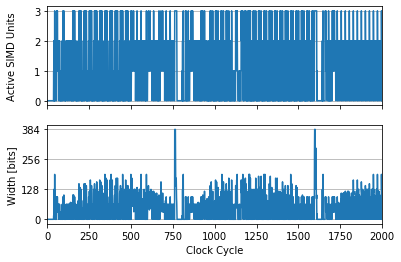

In [8]:
start = 26001750
N = 2000
sl = slice(start, start+N)
df2 = integerNN.iloc[sl].copy()

print('The average unit usage is: {}'.format(df2['fu used'].mean()))
print('The width required is: {}'.format(df2['width'].mean()))

x = df2['cycle'] - df2['cycle'].iloc[0]
y1 = df2['fu used']
y2 = df2['width']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y1)
ax1.set_yticks([0, 1, 2, 3])
ax1.grid(axis='y')
ax1.set_ylabel('Active SIMD Units')
ax2.plot(x, y2)
ax2.set_yticks([0, 128, 256, 384])
ax2.grid(axis='y')
ax2.set_ylabel('Width [bits]')
ax2.set_xlim(0, N)
ax2.set_xlabel('Clock Cycle')
fig.align_ylabels()

#fig.savefig('./plots/trace_integerNN.pdf', bbox_inches='tight')

In [9]:
del integerNN

In [10]:
df_aux = df2[df2['fu used'] > 0]
s_aux = df_aux['width'] / 128 / df_aux['fu used']
print('The average usage of each unit is {0:.2f}'.format(s_aux.mean()))

The average usage of each unit is 0.36


In [11]:
av = df2[df2['fu used'] > 2]['width'].mean()
m = df2[df2['fu used'] > 2]['width'].max()
f = df2[df2['fu used'] > 2].shape[0] / 2000
print('When 3 units are in use ({}), on average only {:.2f} bits are used ({:.2f}% of the full width)'.format(f, av, av/(128*3)*100))

When 3 units are in use (0.092), on average only 153.70 bits are used (40.02% of the full width)


In [27]:
a = df2[df2['fu used'] == 3].shape[0]
b = df2[(df2['fu used'] == 3) & (df2['width'] > (2*128))].shape[0]

print('The third unit is only required in {} of the cycle, when in fact it is used in {}.'.format(b/2000*100, a/2000*100))

The third unit is only required in 0.5499999999999999 of the cycle, when in fact it is used in 9.2.


## 3. Cartoon

In [12]:
cartoon = pd.read_csv('traces/cartoon/trace.csv', header=0,
                      usecols=['tick', 'fu used', 'width'])
cartoon['cycle'] = (cartoon['tick'] - cartoon['tick'].iloc[0]) / 500 
cartoon.shape

(79481734, 4)

The average unit usage is: 0.841
The width required is: 60.408


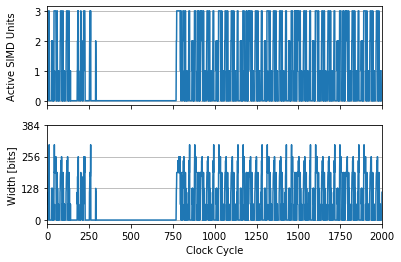

In [13]:
start = 62500000
N = 2000
sl = slice(start, start+N)
df3 = cartoon.iloc[sl].copy()

print('The average unit usage is: {}'.format(df3['fu used'].mean()))
print('The width required is: {}'.format(df3['width'].mean()))

x = df3['cycle'] - df3['cycle'].iloc[0]
y1 = df3['fu used']
y2 = df3['width']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y1)
ax1.set_yticks([0, 1, 2, 3])
ax1.grid(axis='y')
ax1.set_ylabel('Active SIMD Units')
ax2.plot(x, y2)
ax2.set_yticks([0, 128, 256, 384])
ax2.grid(axis='y')
ax2.set_ylabel('Width [bits]')
ax2.set_xlim(0, N)
ax2.set_xlabel('Clock Cycle')
fig.align_ylabels()

#fig.savefig('./plots/trace_cartoon.pdf', bbox_inches='tight')

In [14]:
del cartoon

In [15]:
av = df3[df3['fu used'] > 2]['width'].mean()
m = df3[df3['fu used'] > 2]['width'].max()
f = df3[df3['fu used'] > 2].shape[0] / 2000
print('When 3 units are in use ({}), on average only {:.2f} bits are used ({:.2f}% of the full width)'.format(f, av, av/(128*3)*100))

When 3 units are in use (0.185), on average only 212.32 bits are used (55.29% of the full width)


In [16]:
df_aux = df3[df3['fu used'] > 0]
s_aux = df_aux['width'] / 128 / df_aux['fu used']
print('The average usage of each unit is {0:.2f}'.format(s_aux.mean()))

The average usage of each unit is 0.56
